In [44]:
import sys
sys.executable

'/Library/Developer/CommandLineTools/usr/bin/python3'

In [2]:
#!'/Library/Developer/CommandLineTools/usr/bin/python3' -m pip install smote_variants

In [38]:
#!'/Library/Developer/CommandLineTools/usr/bin/python3' -m pip install imblearn

In [93]:
import pandas as pd
import numpy as np
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from numpy import mean
from numpy import std
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [94]:
import smote_variants as sv

In [95]:
pd.options.mode.chained_assignment = None

In [96]:

from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [98]:
clinical = pd.read_csv('/Users/madhuri/Desktop/MasterThesis/Part2/ClinicalDF1.csv')

In [99]:
dataframe = pd.read_csv('/Users/madhuri/Desktop/MasterThesis/Part2/final_gene_list.csv')

In [87]:
#dataframe = pd.read_csv('/Users/madhuri/Desktop/MasterThesis/Part2/final_gene_list_original.csv')

In [88]:
#dataframe=dataframe.iloc[:-1,1:]

In [89]:
#dataframe.to_csv('final_gene.csv', index=False)

In [90]:
#dd=pd.read_csv('final_gene.csv')

In [91]:
#dd.head()

,X217398_x_at,X1007_s_at,X121_at,X200045_at,X200053_at,X200071_at,X200078_s_at,X200083_at,X200617_at,X200621_at,...,X220558_x_at,X220559_at,X220560_at,X220561_at,X220562_at,X220563_s_at,X220564_at,X220565_at,X220566_at,X220567_at
0,14.8671,11.0591,6.8277,9.5294,8.3286,9.3068,9.5442,9.3407,8.9275,10.1233,...,5.1859,4.2881,4.7643,5.2610,5.6335,4.2882,5.2773,5.2037,4.2883,4.2884
1,14.8777,11.1169,6.7891,9.5766,9.0341,9.5069,9.8331,8.8887,8.9703,9.9776,...,4.2640,5.5825,4.6809,4.2366,5.6856,4.6310,4.4076,5.5568,5.0411,4.6777
2,14.8518,10.9811,6.8793,9.3658,8.4623,9.4156,9.5450,9.1866,9.0396,9.9204,...,5.2548,5.1080,5.5434,4.4733,5.4211,5.6083,5.2171,4.4056,4.3341,4.8077
3,14.8416,10.6992,6.8515,9.4089,8.8189,9.3535,9.4884,9.1249,8.9817,10.0511,...,5.3894,4.4339,4.8631,4.5597,5.2773,5.1513,4.6724,4.4341,4.4342,4.4344
4,14.8518,11.0156,6.6954,9.6096,9.2547,9.2254,9.7614,9.2038,9.2665,10.0792,...,5.7820,5.4174,5.8110,4.9831,5.2830,5.3548,4.3360,4.3361,4.5812,4.3363


In [92]:
#dd.shape

(6802, 20000)

In [102]:
lm_data = dataframe.iloc[:, :979]

In [100]:
dataframe.head()

,X217398_x_at,X1007_s_at,X121_at,X200045_at,X200053_at,X200071_at,X200078_s_at,X200083_at,X200617_at,X200621_at,...,X220558_x_at,X220559_at,X220560_at,X220561_at,X220562_at,X220563_s_at,X220564_at,X220565_at,X220566_at,X220567_at
0,14.8671,11.0591,6.8277,9.5294,8.3286,9.3068,9.5442,9.3407,8.9275,10.1233,...,5.1859,4.2881,4.7643,5.2610,5.6335,4.2882,5.2773,5.2037,4.2883,4.2884
1,14.8777,11.1169,6.7891,9.5766,9.0341,9.5069,9.8331,8.8887,8.9703,9.9776,...,4.2640,5.5825,4.6809,4.2366,5.6856,4.6310,4.4076,5.5568,5.0411,4.6777
2,14.8518,10.9811,6.8793,9.3658,8.4623,9.4156,9.5450,9.1866,9.0396,9.9204,...,5.2548,5.1080,5.5434,4.4733,5.4211,5.6083,5.2171,4.4056,4.3341,4.8077
3,14.8416,10.6992,6.8515,9.4089,8.8189,9.3535,9.4884,9.1249,8.9817,10.0511,...,5.3894,4.4339,4.8631,4.5597,5.2773,5.1513,4.6724,4.4341,4.4342,4.4344
4,14.8518,11.0156,6.6954,9.6096,9.2547,9.2254,9.7614,9.2038,9.2665,10.0792,...,5.7820,5.4174,5.8110,4.9831,5.2830,5.3548,4.3360,4.3361,4.5812,4.3363


In [103]:
dataframe.shape

(6802, 20000)

In [104]:
lm_data.head()

,X217398_x_at,X1007_s_at,X121_at,X200045_at,X200053_at,X200071_at,X200078_s_at,X200083_at,X200617_at,X200621_at,...,X221478_at,X221539_at,X221562_s_at,X222103_at,X34408_at,X36936_at,X37152_at,X40829_at,X56197_at,X1053_at
0,14.8671,11.0591,6.8277,9.5294,8.3286,9.3068,9.5442,9.3407,8.9275,10.1233,...,8.3451,9.2803,6.2694,9.4778,8.0103,8.6594,7.4108,7.0611,8.5263,7.9602
1,14.8777,11.1169,6.7891,9.5766,9.0341,9.5069,9.8331,8.8887,8.9703,9.9776,...,8.7756,9.1470,6.2546,9.4244,7.7300,8.9922,7.4360,6.9175,8.6045,8.0854
2,14.8518,10.9811,6.8793,9.3658,8.4623,9.4156,9.5450,9.1866,9.0396,9.9204,...,8.3766,9.1706,5.9027,9.2119,7.9278,8.8858,7.2649,7.2223,8.9600,7.9740
3,14.8416,10.6992,6.8515,9.4089,8.8189,9.3535,9.4884,9.1249,8.9817,10.0511,...,9.3018,9.3146,6.0560,9.4476,7.5871,8.7029,7.2744,6.8912,8.8958,7.6997
4,14.8518,11.0156,6.6954,9.6096,9.2547,9.2254,9.7614,9.2038,9.2665,10.0792,...,9.1209,9.7381,6.2503,9.2872,8.1147,8.9800,7.2350,6.8240,8.7511,7.8511


In [105]:
lm_data.shape

(6802, 979)

In [106]:
lm_data['CancerType']=clinical['CancerType']

In [107]:
X= lm_data.iloc[:, :-1]
y=lm_data['CancerType']



2022-04-23 07:50:55,014:DEBUG:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2022-04-23 07:50:55,015:DEBUG:findfont: score(FontEntry(fname='/Users/madhuri/Library/Python/3.8/lib/python/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymBol.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2022-04-23 07:50:55,015:DEBUG:findfont: score(FontEntry(fname='/Users/madhuri/Library/Python/3.8/lib/python/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Bold.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2022-04-23 07:50:55,015:DEBUG:findfont: score(FontEntry(fname='/Users/madhuri/Library/Python/3.8/lib/python/site-packages/matplotlib/mpl-data/fonts/ttf/cmb10.ttf', name='cmb10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,016:DEB

2022-04-23 07:50:55,022:DEBUG:findfont: score(FontEntry(fname='/Users/madhuri/Library/Python/3.8/lib/python/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,022:DEBUG:findfont: score(FontEntry(fname='/Users/madhuri/Library/Python/3.8/lib/python/site-packages/matplotlib/mpl-data/fonts/ttf/cmsy10.ttf', name='cmsy10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,022:DEBUG:findfont: score(FontEntry(fname='/Users/madhuri/Library/Python/3.8/lib/python/site-packages/matplotlib/mpl-data/fonts/ttf/cmmi10.ttf', name='cmmi10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,022:DEBUG:findfont: score(FontEntry(fname='/Users/madhuri/Library/Python/3.8/lib/python/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniBol.ttf', 

2022-04-23 07:50:55,029:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneralItalic.otf', name='STIXGeneral', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2022-04-23 07:50:55,029:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/AppleGothic.ttf', name='AppleGothic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,029:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansThaana-Regular.ttf', name='Noto Sans Thaana', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,029:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/PingFang.ttc', name='PingFang HK', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,029:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Suppl

2022-04-23 07:50:55,036:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tahoma Bold.ttf', name='Tahoma', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2022-04-23 07:50:55,037:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/SFNS.ttf', name='System Font', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,037:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Menlo.ttc', name='Menlo', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,037:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/AppleMyungjo.ttf', name='AppleMyungjo', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,037:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTakri-Regular.ttf', name='Noto Sans T

2022-04-23 07:50:55,043:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Skia.ttf', name='Skia', style='normal', variant='normal', weight=5, stretch='normal', size='scalable')) = 10.42525
2022-04-23 07:50:55,043:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldTurkic-Regular.ttf', name='Noto Sans Old Turkic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,043:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansGlagolitic-Regular.ttf', name='Noto Sans Glagolitic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,044:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCoptic-Regular.ttf', name='Noto Sans Coptic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,044:DEBUG:findfont: score(

2022-04-23 07:50:55,050:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSyriac-Regular.ttf', name='Noto Sans Syriac', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,050:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBamum-Regular.ttf', name='Noto Sans Bamum', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,050:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMultani-Regular.ttf', name='Noto Sans Multani', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,051:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Hoefler Text Ornaments.ttf', name='Hoefler Text', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,051:DEBUG:findfo

2022-04-23 07:50:55,057:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Kohinoor.ttc', name='Kohinoor Devanagari', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,057:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier New Italic.ttf', name='Courier New', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2022-04-23 07:50:55,057:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOsage-Regular.ttf', name='Noto Sans Osage', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,057:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansRejang-Regular.ttf', name='Noto Sans Rejang', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,058:DEBUG:findfont: score(FontEntry(fname='/Sys

2022-04-23 07:50:55,064:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana Italic.ttf', name='Verdana', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 4.6863636363636365
2022-04-23 07:50:55,064:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W1.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=200, stretch='normal', size='scalable')) = 10.24
2022-04-23 07:50:55,065:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/LucidaGrande.ttc', name='Lucida Grande', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 2.872272727272727
2022-04-23 07:50:55,065:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansGothic-Regular.ttf', name='Noto Sans Gothic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,065:DEBUG:findfont: score(FontEntry(fname='/System/Lib

2022-04-23 07:50:55,071:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpBol.otf', name='STIXIntegralsUp', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2022-04-23 07:50:55,071:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/AppleSDGothicNeo.ttc', name='Apple SD Gothic Neo', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,071:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Galvji.ttc', name='Galvji', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,072:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansElbasan-Regular.ttf', name='Noto Sans Elbasan', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,072:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fon

2022-04-23 07:50:55,077:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansInscriptionalPahlavi-Regular.ttf', name='Noto Sans Inscriptional Pahlavi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,078:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/SukhumvitSet.ttc', name='Sukhumvit Set', style='normal', variant='normal', weight=250, stretch='normal', size='scalable')) = 10.1925
2022-04-23 07:50:55,078:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXNonUniBolIta.otf', name='STIXNonUnicode', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
2022-04-23 07:50:55,078:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Herculanum.ttf', name='Herculanum', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,078:DEBUG:findfont:

2022-04-23 07:50:55,084:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Lao MN.ttc', name='Lao MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,084:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Narrow Bold.ttf', name='Arial Narrow', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535
2022-04-23 07:50:55,085:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Farisi.ttf', name='Farisi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,085:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Zapfino.ttf', name='Zapfino', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,085:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/KohinoorBangla.ttc', name='K

2022-04-23 07:50:55,091:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansKhojki-Regular.ttf', name='Noto Sans Khojki', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,091:DEBUG:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/Users/madhuri/Library/Python/3.8/lib/python/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.
2022-04-23 07:50:55,112:DEBUG:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2022-04-23 07:50:55,112:DEBUG:findfont: score(FontEntry(fname='/Users/madhuri/Library/Python/3.8/lib/python/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymBol.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2022-04-23 07:50:55,113:DEBUG:findfont: score(FontEntry(fname='/U

2022-04-23 07:50:55,163:DEBUG:findfont: score(FontEntry(fname='/Users/madhuri/Library/Python/3.8/lib/python/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralItalic.ttf', name='STIXGeneral', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2022-04-23 07:50:55,163:DEBUG:findfont: score(FontEntry(fname='/Users/madhuri/Library/Python/3.8/lib/python/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2022-04-23 07:50:55,163:DEBUG:findfont: score(FontEntry(fname='/Users/madhuri/Library/Python/3.8/lib/python/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,163:DEBUG:findfont: score(FontEntry(fname='/Users/madhuri/Library/Python/3.8/lib/python/site-packages/matplotlib/mpl-data

2022-04-23 07:50:55,170:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Keyboard.ttf', name='.Keyboard', style='normal', variant='normal', weight=100, stretch='normal', size='scalable')) = 10.335
2022-04-23 07:50:55,170:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sinhala MN.ttc', name='Sinhala MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,170:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/NotoSansArmenian.ttc', name='Noto Sans Armenian', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525
2022-04-23 07:50:55,170:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneralItalic.otf', name='STIXGeneral', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2022-04-23 07:50:55,171:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/AppleGothic

2022-04-23 07:50:55,176:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansYi-Regular.ttf', name='Noto Sans Yi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,176:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSoraSompeng-Regular.ttf', name='Noto Sans Sora Sompeng', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,177:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansAdlam-Regular.ttf', name='Noto Sans Adlam', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,177:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tahoma Bold.ttf', name='Tahoma', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2022-04-23 07:50:55,177:DEBUG:findfont: score(FontE

2022-04-23 07:50:55,184:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansKaithi-Regular.ttf', name='Noto Sans Kaithi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,184:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille Pinpoint 8 Dot.ttf', name='Apple Braille', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,184:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/EuphemiaCAS.ttc', name='Euphemia UCAS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,184:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Skia.ttf', name='Skia', style='normal', variant='normal', weight=5, stretch='normal', size='scalable')) = 10.42525
2022-04-23 07:50:55,184:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/

2022-04-23 07:50:55,191:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Telugu MN.ttc', name='Telugu MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,191:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBassaVah-Regular.ttf', name='Noto Sans Bassa Vah', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,191:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSaurashtra-Regular.ttf', name='Noto Sans Saurashtra', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,191:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSyriac-Regular.ttf', name='Noto Sans Syriac', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,191:DEBUG:findfont:

2022-04-23 07:50:55,199:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXNonUniBol.otf', name='STIXNonUnicode', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2022-04-23 07:50:55,199:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizThreeSymReg.otf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,199:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLepcha-Regular.ttf', name='Noto Sans Lepcha', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,199:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Kohinoor.ttc', name='Kohinoor Devanagari', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,199:DEBUG:findfont: score(FontEntry(fname='/System

2022-04-23 07:50:55,205:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana.ttf', name='Verdana', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 3.6863636363636365
2022-04-23 07:50:55,205:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille.ttf', name='Apple Braille', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,206:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansJavanese-Regular.otf', name='Noto Sans Javanese', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,206:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana Italic.ttf', name='Verdana', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 4.6863636363636365
2022-04-23 07:50:55,206:DEBUG:findfont: score(FontEntry(fname='/Syst

2022-04-23 07:50:55,266:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Phosphate.ttc', name='Phosphate', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,266:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Ayuthaya.ttf', name='Ayuthaya', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,266:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/DevanagariMT.ttc', name='Devanagari MT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,266:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/PTMono.ttc', name='PT Mono', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2022-04-23 07:50:55,267:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpBol.

2022-04-23 07:50:55,280:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gujarati Sangam MN.ttc', name='Gujarati Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,281:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Myanmar MN.ttc', name='Myanmar MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,281:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trebuchet MS Bold Italic.ttf', name='Trebuchet MS', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
2022-04-23 07:50:55,282:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpSmReg.otf', name='STIXIntegralsUpSm', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,282:DEBUG:findfont: score(FontEntry(fnam

2022-04-23 07:50:55,298:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Hiragino Sans GB.ttc', name='Hiragino Sans GB', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145
2022-04-23 07:50:55,299:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Bold.ttf', name='Arial', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 6.698636363636363
2022-04-23 07:50:55,299:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizOneSymBol.otf', name='STIXSizeOneSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2022-04-23 07:50:55,300:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/GujaratiMT.ttc', name='Gujarati MT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,300:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/

2022-04-23 07:50:55,314:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Baskerville.ttc', name='Baskerville', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,314:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/DIN Condensed Bold.ttf', name='DIN Condensed', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535
2022-04-23 07:50:55,315:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Oriya MN.ttc', name='Oriya MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,315:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/MarkerFelt.ttc', name='Marker Felt', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-23 07:50:55,315:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoS

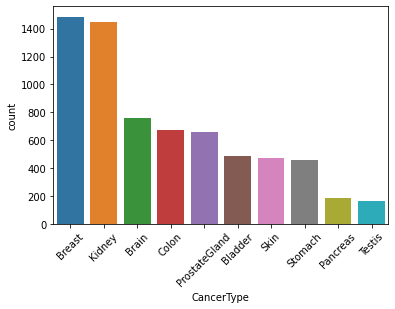

In [24]:
# sns.countplot(x = 'CancerType',
#               data = lm_data,
#               order = lm_data['CancerType'].value_counts().index)
# plt.xticks(rotation=45)
# plt.show()

In [108]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.3,random_state=0) 

/Users/madhuri/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


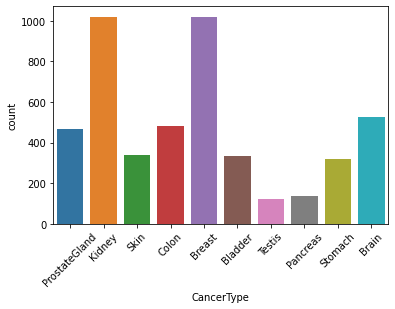

In [35]:
# sns.countplot(y_train)
# plt.xticks(rotation=45)
# plt.show()

In [109]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [110]:
le = LabelEncoder()
le.fit(y_train)
y_train_enc= le.transform(y_train)
y_test_enc=le.transform(y_test)

In [111]:
# Define SMOTE-Tomek Links
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X_samp, y_samp = resample.fit_resample(X_scaled, y_train_enc)


/Users/madhuri/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
2022-04-22 17:39:04,725:DEBUG:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
2022-04-22 17:39:04,726:DEBUG:findfont: score(FontEntry(fname='/Users/madhuri/Library/Python/3.8/lib/python/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymBol.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2022-04-22 17:39:04,726:DEBUG:findfont: score(FontEntry(fname='/Users/madhuri/Library/Python/3.8/lib/python/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Bold.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=700, s

2022-04-22 17:39:04,733:DEBUG:findfont: score(FontEntry(fname='/Users/madhuri/Library/Python/3.8/lib/python/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralItalic.ttf', name='STIXGeneral', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2022-04-22 17:39:04,734:DEBUG:findfont: score(FontEntry(fname='/Users/madhuri/Library/Python/3.8/lib/python/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2022-04-22 17:39:04,734:DEBUG:findfont: score(FontEntry(fname='/Users/madhuri/Library/Python/3.8/lib/python/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-22 17:39:04,734:DEBUG:findfont: score(FontEntry(fname='/Users/madhuri/Library/Python/3.8/lib/python/site-packages/matplotlib/mpl-data

2022-04-22 17:39:04,742:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Keyboard.ttf', name='.Keyboard', style='normal', variant='normal', weight=100, stretch='normal', size='scalable')) = 10.335
2022-04-22 17:39:04,742:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sinhala MN.ttc', name='Sinhala MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-22 17:39:04,743:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/NotoSansArmenian.ttc', name='Noto Sans Armenian', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525
2022-04-22 17:39:04,743:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneralItalic.otf', name='STIXGeneral', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2022-04-22 17:39:04,743:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/AppleGothic

2022-04-22 17:39:04,749:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansYi-Regular.ttf', name='Noto Sans Yi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-22 17:39:04,749:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSoraSompeng-Regular.ttf', name='Noto Sans Sora Sompeng', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-22 17:39:04,750:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansAdlam-Regular.ttf', name='Noto Sans Adlam', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-22 17:39:04,750:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tahoma Bold.ttf', name='Tahoma', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2022-04-22 17:39:04,750:DEBUG:findfont: score(FontE

2022-04-22 17:39:04,757:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansKaithi-Regular.ttf', name='Noto Sans Kaithi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-22 17:39:04,757:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille Pinpoint 8 Dot.ttf', name='Apple Braille', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-22 17:39:04,757:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/EuphemiaCAS.ttc', name='Euphemia UCAS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-22 17:39:04,757:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Skia.ttf', name='Skia', style='normal', variant='normal', weight=5, stretch='normal', size='scalable')) = 10.42525
2022-04-22 17:39:04,758:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/

2022-04-22 17:39:04,763:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Telugu MN.ttc', name='Telugu MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-22 17:39:04,763:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBassaVah-Regular.ttf', name='Noto Sans Bassa Vah', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-22 17:39:04,764:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSaurashtra-Regular.ttf', name='Noto Sans Saurashtra', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-22 17:39:04,764:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSyriac-Regular.ttf', name='Noto Sans Syriac', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-22 17:39:04,764:DEBUG:findfont:

2022-04-22 17:39:04,770:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXNonUniBol.otf', name='STIXNonUnicode', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2022-04-22 17:39:04,770:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizThreeSymReg.otf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-22 17:39:04,770:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLepcha-Regular.ttf', name='Noto Sans Lepcha', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-22 17:39:04,770:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Kohinoor.ttc', name='Kohinoor Devanagari', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-22 17:39:04,771:DEBUG:findfont: score(FontEntry(fname='/System

2022-04-22 17:39:04,777:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana.ttf', name='Verdana', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 3.6863636363636365
2022-04-22 17:39:04,778:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille.ttf', name='Apple Braille', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-22 17:39:04,778:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansJavanese-Regular.otf', name='Noto Sans Javanese', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-22 17:39:04,778:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana Italic.ttf', name='Verdana', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 4.6863636363636365
2022-04-22 17:39:04,778:DEBUG:findfont: score(FontEntry(fname='/Syst

2022-04-22 17:39:04,785:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Phosphate.ttc', name='Phosphate', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-22 17:39:04,785:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Ayuthaya.ttf', name='Ayuthaya', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-22 17:39:04,785:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/DevanagariMT.ttc', name='Devanagari MT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-22 17:39:04,785:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/PTMono.ttc', name='PT Mono', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2022-04-22 17:39:04,786:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpBol.

2022-04-22 17:39:04,792:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gujarati Sangam MN.ttc', name='Gujarati Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-22 17:39:04,792:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Myanmar MN.ttc', name='Myanmar MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-22 17:39:04,792:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trebuchet MS Bold Italic.ttf', name='Trebuchet MS', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
2022-04-22 17:39:04,792:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpSmReg.otf', name='STIXIntegralsUpSm', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-22 17:39:04,792:DEBUG:findfont: score(FontEntry(fnam

2022-04-22 17:39:04,798:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Hiragino Sans GB.ttc', name='Hiragino Sans GB', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145
2022-04-22 17:39:04,799:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Bold.ttf', name='Arial', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 6.698636363636363
2022-04-22 17:39:04,799:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizOneSymBol.otf', name='STIXSizeOneSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2022-04-22 17:39:04,799:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/GujaratiMT.ttc', name='Gujarati MT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-22 17:39:04,799:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/

2022-04-22 17:39:04,805:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Baskerville.ttc', name='Baskerville', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-22 17:39:04,805:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/DIN Condensed Bold.ttf', name='DIN Condensed', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535
2022-04-22 17:39:04,805:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Oriya MN.ttc', name='Oriya MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-22 17:39:04,805:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/MarkerFelt.ttc', name='Marker Felt', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-04-22 17:39:04,806:DEBUG:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoS

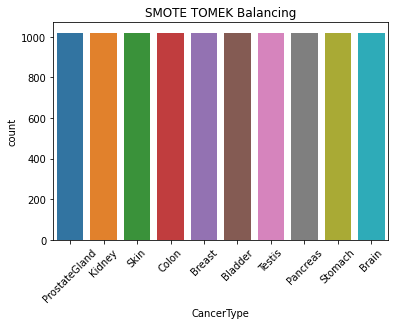

In [56]:

# sns.countplot(y_samp)
# plt.xticks(rotation=45)
# plt.title("SMOTE TOMEK Balancing")
# plt.savefig('Stomekcount.png')
# plt.show()

In [39]:
# le = LabelEncoder()
# le.fit(y_train)
# y_enc= le.transform(y_train)
# y_test=le.transform(y_test)

In [40]:
#y_test

3558           Breast
4368           Kidney
6589           Testis
1238             Skin
4388           Kidney
            ...      
2188            Brain
6205          Stomach
3491           Breast
5809    ProstateGland
378           Bladder
Name: CancerType, Length: 2041, dtype: object

In [112]:
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='sag', max_iter = 2000)
# define the model evaluation procedur
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)#make n_repeats=10
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X_samp, y_samp, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.967 (0.005)


In [113]:
model.fit(X_samp,y_samp)

LogisticRegression(max_iter=2000, multi_class='multinomial', solver='sag')

In [114]:
y_pred=model.predict(X_test)

In [44]:
#y_pred

array([2, 4, 9, ..., 2, 6, 0])

In [115]:
from sklearn.metrics import confusion_matrix

In [116]:
confusion_matrix(y_test_enc,y_pred)

array([[139,   0,   4,   0,   2,   0,   0,   1,   0,   0],
       [  1, 214,   4,   0,   1,   0,   0,   4,   4,   0],
       [  1,   7, 400,   5,  30,   1,   1,   1,   0,   0],
       [  2,   0,   8, 175,   5,   2,   6,   4,   0,   1],
       [  4,   0,  24,   9, 372,   0,  15,   1,   5,   4],
       [  0,   2,   2,   1,   1,  38,   1,   1,   1,   9],
       [  1,   1,   2,  11,  14,   0, 166,   0,   3,   0],
       [  0,   2,   3,   4,   0,   1,   0, 132,   0,   0],
       [  0,   0,   0,   1,   1,   0,   3,   0, 133,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,   0,  48]])

In [117]:
from sklearn import metrics
from sklearn.metrics import *

In [118]:
#f1_score(y_test_enc, y_pred, average='micro') #use macro for multiclass because micro gives same value as accuracy

In [84]:
#f1_score(y_test_enc, y_pred, average='macro')

0.8819237729293589

In [119]:
metrics.accuracy_score(y_test_enc,y_pred)*100

89.0249877511024

In [120]:
print(metrics.classification_report(y_test_enc, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.939     0.952     0.946       146
           1      0.947     0.939     0.943       228
           2      0.895     0.897     0.896       446
           3      0.850     0.862     0.856       203
           4      0.873     0.857     0.865       434
           5      0.864     0.679     0.760        56
           6      0.865     0.838     0.851       198
           7      0.917     0.930     0.923       142
           8      0.911     0.964     0.937       138
           9      0.774     0.960     0.857        50

    accuracy                          0.890      2041
   macro avg      0.883     0.888     0.883      2041
weighted avg      0.891     0.890     0.890      2041



In [86]:
#print(metrics.classification_report(y_test_enc, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.933     0.959     0.946       146
           1      0.947     0.943     0.945       228
           2      0.890     0.892     0.891       446
           3      0.859     0.867     0.863       203
           4      0.871     0.855     0.863       434
           5      0.860     0.661     0.747        56
           6      0.878     0.838     0.858       198
           7      0.917     0.930     0.923       142
           8      0.905     0.964     0.933       138
           9      0.762     0.960     0.850        50

    accuracy                          0.890      2041
   macro avg      0.882     0.887     0.882      2041
weighted avg      0.890     0.890     0.889      2041

